In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [2]:
def huber(x: np.array, k: float):
    phi = lambda elem: elem if abs(elem) < k else k * np.sign(elem)

    return np.mean([phi(elem) for elem in x])

def boxplot_rull(x: np.array):
    outlyings = plt.boxplot(x)
    clear_res = [i for i in x if not i in outlyings["fliers"]]

    return clear_res

def double_stage_mean(x: np.array):
    x = boxplot_rull(x)
    return np.mean(x)

In [3]:
distributions = {
    "Нормальное": stats.norm.rvs,
    "Коши": stats.cauchy.rvs,
    "Смешанное": lambda size: 0.9 * stats.norm.rvs(size=size) + 0.1 * stats.cauchy.rvs(size=size) 
}

measures = {
    "среднее": np.mean,
    "медиана": np.median,
    "Хубер": lambda x: huber(x, 1.44),
    "2-эт": double_stage_mean
}


In [4]:
def monte_karlo(N: int, sample_size: int, dist_grvs, measure):
    means = [measure(dist_grvs(size=sample_size)) for _ in range(N)]

    return np.mean(means), np.var(means)

In [5]:
def main(N : int = 10000, sample_size: int = 100):
    for dname, grvs in distributions.items():
        print(dname)
        for mname, measure in measures.items():
            mu, var = monte_karlo(N, sample_size, grvs, measure)
            print(f"\t{mname}")
            print(f"\t\tСреднее:\t{mu:.6f}")
            print(f"\t\tДисперсия:\t{var:.6f}")
        print("")


Нормальное
	среднее
		Среднее:	0.000708
		Дисперсия:	0.009981
	медиана
		Среднее:	0.001255
		Дисперсия:	0.015824
	Хубер
		Среднее:	0.000727
		Дисперсия:	0.007602
	2-эт
		Среднее:	0.001004
		Дисперсия:	0.009916

Коши
	среднее
		Среднее:	-0.269203
		Дисперсия:	6246.029719
	медиана
		Среднее:	-0.004566
		Дисперсия:	0.026008
	Хубер
		Среднее:	-0.000582
		Дисперсия:	0.010945
	2-эт
		Среднее:	0.946442
		Дисперсия:	2695.832890

Смешанное
	среднее
		Среднее:	0.097759
		Дисперсия:	216.668674
	медиана
		Среднее:	0.001308
		Дисперсия:	0.015016
	Хубер
		Среднее:	0.000863
		Дисперсия:	0.007687
	2-эт
		Среднее:	3.896290
		Дисперсия:	132400.005924



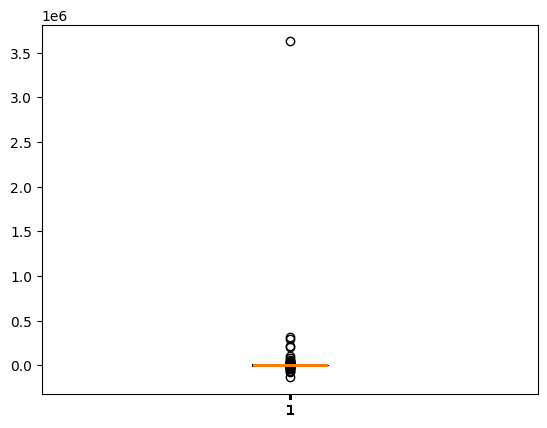

In [6]:
main()